# Credit Card Approval    


Generally, Banks receive lots of requests for loans or credit card however they cannot accept all.
They use many filterings to their default or overdraft risks coming from their customers. Abviously, it is a lenthy process to do that manually however machine learning ppower can help them to reduced their default risks. 
In this notebook I will look at the process of approval credit card based on statistical methond and machine learning approaches

In [1]:
# Import pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
sns.set(color_codes=True)
from scipy.stats import chisquare,chi2_contingency
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings('ignore')
# Load dataset
credit = pd.read_csv(r'C:\Users\X550LD\Desktop\ML\credit_clean.csv')

# Inspect data
credit.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


# 1 - Dealing With Missing Values

In the dataset there are missing values but they have beed replaced with questions mark "?". So for the first action I replace 
the sign with <code>np.NaN</code>, therefore I will deal better with missing values. 
Since there are two general types of data, numerical and categorical, we have to use different methods to impute missing values.
For numerical data, mean or median imputation can be applied as our data is not actually imbalanced, and for categorical data as the mean or median aren't working for them, I would to impute these missing values with the most frequent values as present in the respective columns.
Ignoring the missing values can affect our machine learning model and miss out on information about the dataset that may be useful. The other reason is, some techniques such as Linear Discriminant Analysis (LDA) cannot handle missing values implicilty.

In [2]:

# Replace the '?'s with NaN
credit= credit.replace('?', np.NaN)

# Impute the missing values on numerical based on mean imputation
credit.fillna(credit.mean(), inplace=True)

# Impute missing values applied on categorical data
for col in credit.columns:
    # Check if the column is of object type
    if credit[col].dtypes == 'object':
        # Impute with the most frequent value
        credit = credit.fillna(credit[col].value_counts().index[0])


As we have seen, the dataset has different type of variables. Some of them are numerical and the others are categorical.
Age can be an example of numerical type and it is also continous, and Gender is an example of categorical with male and female
that can be masked as 1 and 0. It is important to see what kind of data distinguishes the informative and non-informative. 
It is not applicable to see different types of data, especially for categorical data that can be repeatable, so we can see the component of each columns as the following code :

In [3]:
cat = credit.select_dtypes('object').columns
for col in cat:
    print( col, '--->',credit[col].unique())

Industry ---> ['Industrials' 'Materials' 'CommunicationServices' 'Transport'
 'InformationTechnology' 'Financials' 'Energy' 'Real Estate' 'Utilities'
 'ConsumerDiscretionary' 'Education' 'ConsumerStaples' 'Healthcare'
 'Research']
Ethnicity ---> ['White' 'Black' 'Asian' 'Latino' 'Other']
Citizen ---> ['ByBirth' 'ByOtherMeans' 'Temporary']


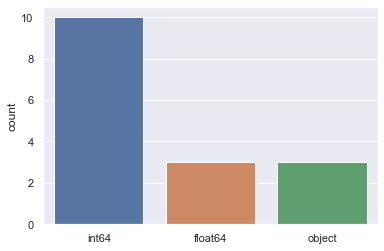

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 86.4+ KB
None




In [4]:

sns.countplot(credit.dtypes.map(str))
plt.show()
# Print DataFrame information
credit_info = credit.info()
print(credit_info)

print('\n')


#  2 - EDA and Statistical Inference
Now, we have a first impression of data. The probable features in a typical credit card application are <code>Gender</code>, <code>Age</code>, <code>Debt</code>, <code>Married</code>, <code>BankCustomer</code>, <code>EducationLevel</code>, <code>Ethnicity</code>, <code>YearsEmployed</code>, <code>PriorDefault</code>, <code>Employed</code>, <code>CreditScore</code>, <code>DriversLicense</code>, <code>Citizen</code>, <code>ZipCode</code>, <code>Income</code> and finally the <code>ApprovalStatus</code>. This would be a good staring point for us, but we are not still aware of the importance of features. At the first step, I will ignore some features like <code>DriversLicense</code> and <code>ZipCode</code> as they are not informative as the other features in the dataset for predicting credit card approvals. To get a better sense, we can apply some hypothesis testing along with their visualizations to see what features are probably more important the others

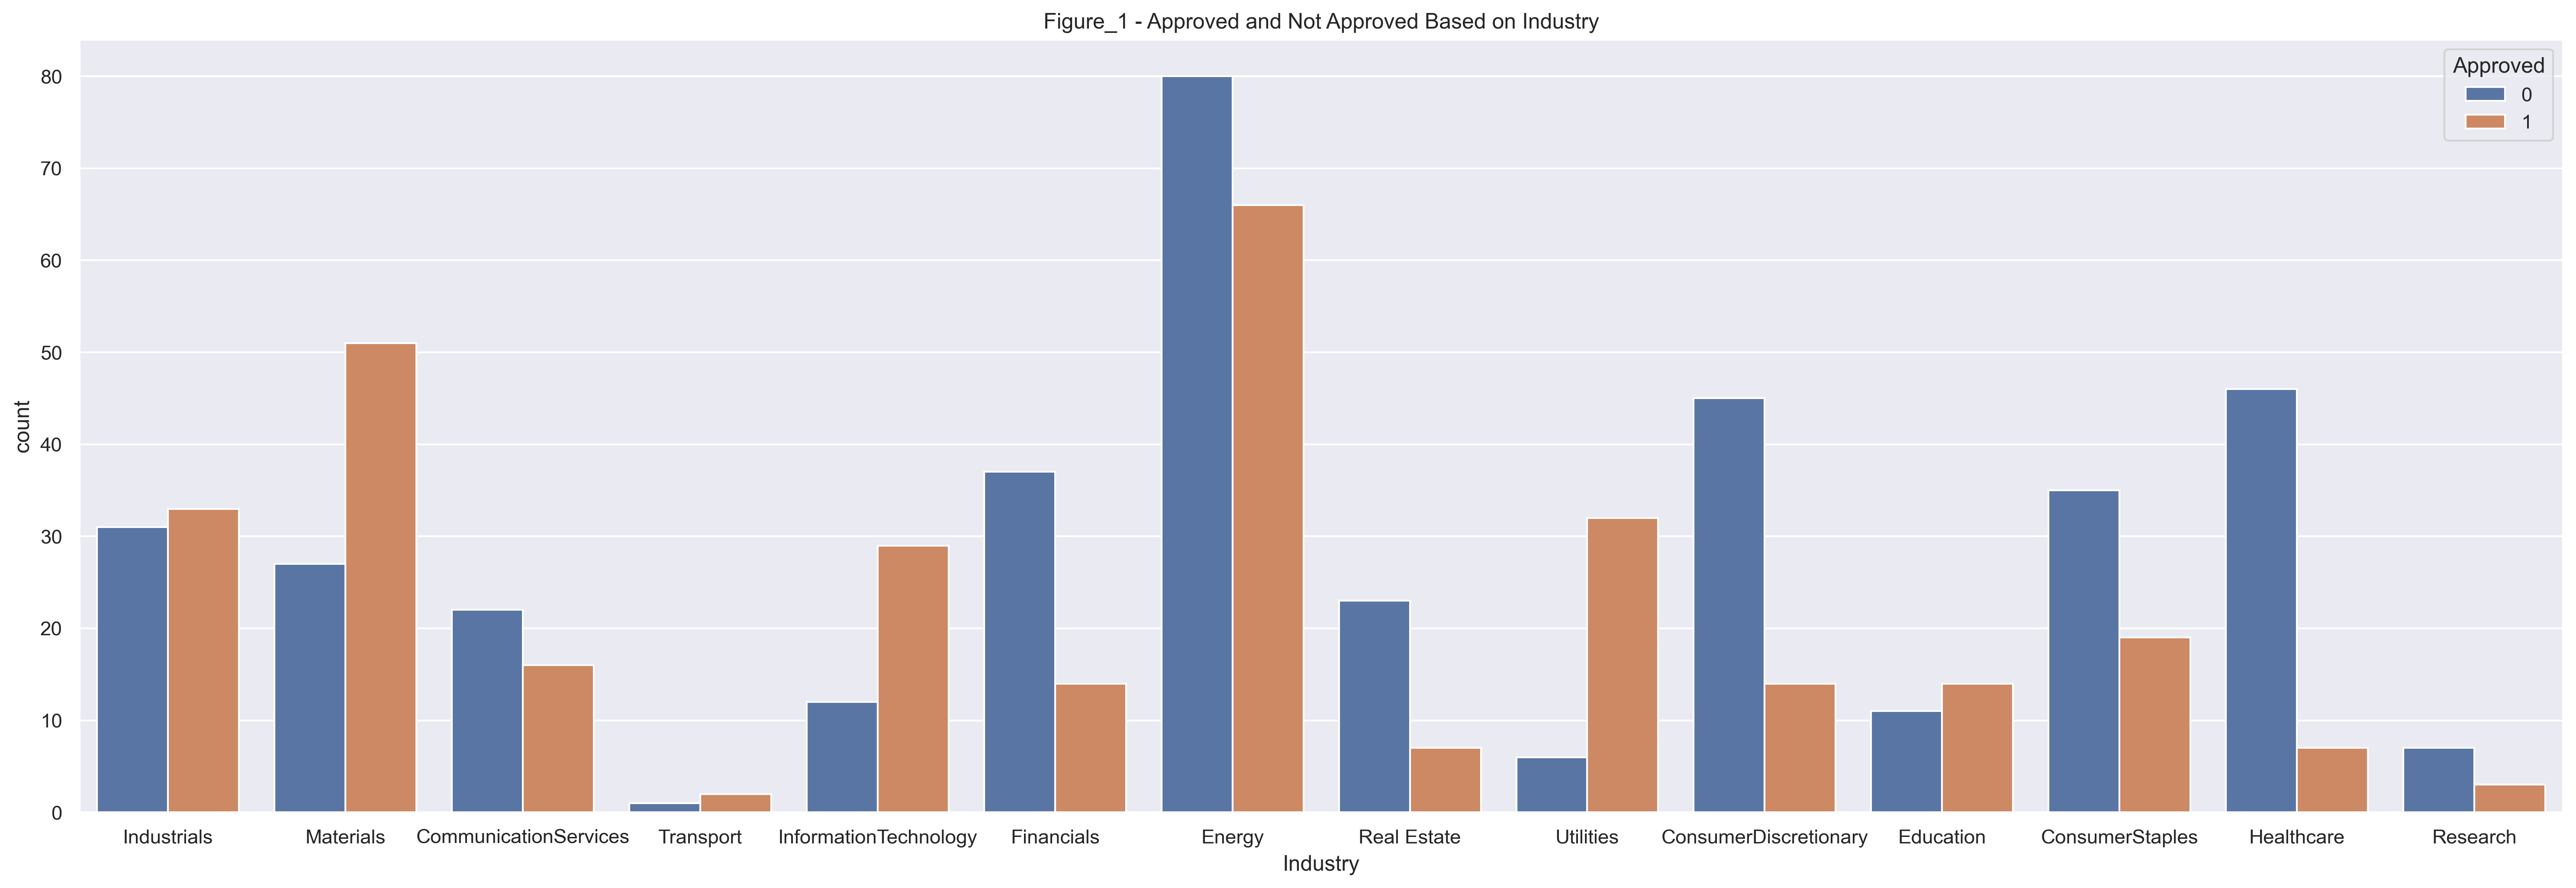

In [5]:
plt.figure(figsize=(20,7),dpi=300)

sns.countplot(data=credit,x='Industry',hue='Approved')
plt.title('Figure_1 - Approved and Not Approved Based on Industry')

plt.tight_layout()

In [6]:
Perc_App_Ind = pd.DataFrame(round(credit.loc[:,['Approved','Industry']].groupby('Industry').sum()/
                                  credit.loc[:,['Approved','Industry']].groupby('Industry').count(),2))
Perc_App_Ind.sort_values('Approved',ascending=False)

,Approved
Industry,
Utilities,0.84
InformationTechnology,0.71
Transport,0.67
Materials,0.65
Education,0.56
Industrials,0.52
Energy,0.45
CommunicationServices,0.42
ConsumerStaples,0.35


So,'Figure_1' shows which industries people are coming from, and they have been approved or not approved.
So basically some industries such as <code>Healthcare</code> or <code>Consumer Discretionary</code> are more failed.
Therefore that <code>Industry</code> can be a potential feature as an important one.

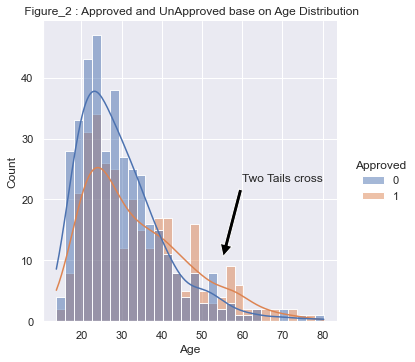

In [7]:
sns.displot(data=credit,x='Age',bins=30,kde=True,hue='Approved')
plt.annotate('Two Tails cross', xy=(55, 10), xytext=(60,23),
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.title (' Figure_2 : Approved and UnApproved base on Age Distribution')
plt.show()

The second graph is an interesting one. In general, there are many reasons why a bank will reject applications when a person has a low or moderate income or does not have enough funds to support themselves against debts, and this happens more often in the early years of work. . Therefore, according to the graph, it is possible to see the ages below 40 years (almost or slightly less than 40 years), the number of unapproved applications is more than one approved one.
After 40 (or under 40) the number of endorsements increases, which tells us that age is an informative characteristic.

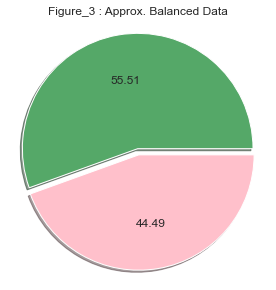

Approved    0    1
Approved          
0         383    0
1           0  307


In [8]:
plt.figure(figsize=(4,4))

plt.pie(credit['Approved'].value_counts(),colors=['g','pink']
        ,explode=[0.03,0.03],autopct='%.2f',shadow=5,radius=1.1)

plt.tight_layout()
plt.title('Figure_3 : Approx. Balanced Data')
plt.show()
print(pd.crosstab(credit.Approved, credit.Approved))

Figure_3: As I mentioned earlier, our data set is not imbalanced. In general, data sets for predicting default rates or detecting fraud are imbalanced data. Working with imbalanced data requires techniques to obtain meaningful output and is beyond the scope of this project. As we can see here, the number of approved credit cards and 307 unapproved credit cards is 383.

In [24]:
sig_Item =credit.groupby('Approved')['Age','Debt','CreditScore','Income'].mean()
pd.DataFrame(sig_Item)

,Age,Debt,CreditScore,Income
Approved,,,,
0,29.773029,3.839948,0.631854,198.605744
1,33.686221,5.904951,4.605863,2038.859935


In the table above, we can see some continuous features separated by the "Approved" column. Except for age, all have significant differences in their means. Particularly, there are noticeable large gaps in average income and credit scores. So here it is good to check their graphs and see their distribution.

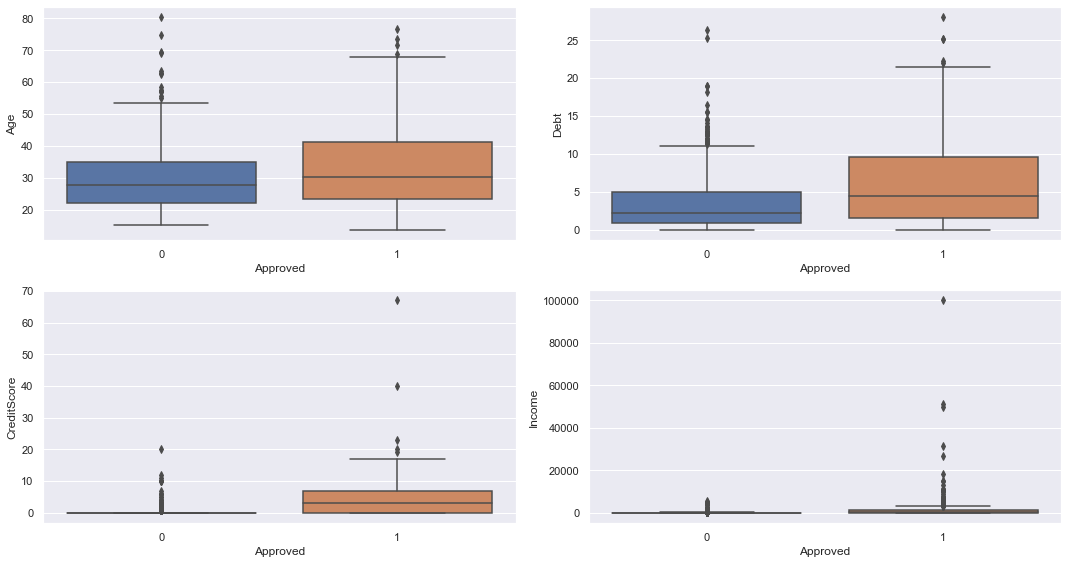

In [133]:
plt.figure(figsize=(15,8))

plt.subplot(2,2,1)
sns.boxplot(data=credit,x='Approved',y='Age')

plt.subplot(2,2,2)
sns.boxplot(data=credit,x='Approved',y='Debt')

plt.subplot(2,2,3)
sns.boxplot(data=credit,x='Approved',y='CreditScore')

plt.subplot(2,2,4)
sns.boxplot(data=credit,x='Approved',y='Income')

plt.tight_layout()
plt.show()

The second row graphs demonstrate some weird points that can be outliers. Let's try to see what is the characteristics of those two highest points in credit score and income

In [119]:
print('The highest point in Credit Score :')
print('\n')
maxim_1 = credit['CreditScore'].idxmax()
print(credit[['Age','Debt','CreditScore','Income','Industry']].iloc[maxim_1])

print('------------------------------------')

print('The highest point in Income :')
print('\n')
maxim_2 = credit['Income'].idxmax()
print( credit[['Age','Debt','CreditScore','Income','Industry']].iloc[maxim_2])


The highest point in Credit Score :


Age                            25.67
Debt                            12.5
CreditScore                       67
Income                           258
Industry       InformationTechnology
Name: 121, dtype: object
------------------------------------
The highest point in Income :


Age                  17.5
Debt                 22.0
CreditScore             0
Income             100000
Industry       Healthcare
Name: 317, dtype: object


In [106]:
maxim_2 = credit['Income'].idxmax()
credit[['Age','Debt','CreditScore','Income','Industry']].iloc[maxim_2]

Age                  17.5
Debt                 22.0
CreditScore             0
Income             100000
Industry       Healthcare
Name: 317, dtype: object

The interesting thing to note here is that the highest credit score is related to the IT industry, which ranks second in "approved" programs. However, the highest revenue comes from the healthcare industry, which is the last industry to receive an approved application and both have the same amount of debt. Is there bias in these decisions?!!!!!!
That can be a trigger for data scientists !!!

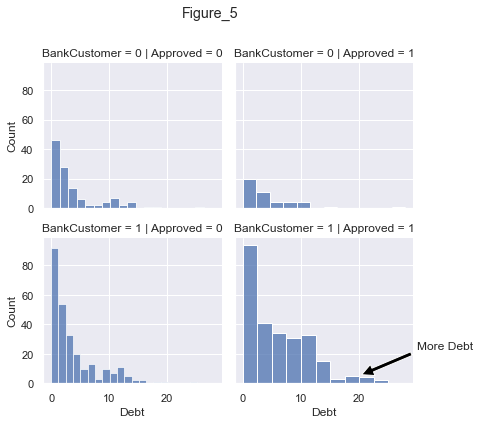

In [134]:
Customer = credit[credit['BankCustomer']==1]
Non_Customer = credit[credit['BankCustomer']==0]

g = sns.FacetGrid(credit, col="Approved",  row="BankCustomer")
g.map_dataframe(sns.histplot, x="Debt")
plt.annotate('More Debt', xy=(20, 5), xytext=(30,23),
            arrowprops=dict(facecolor='black', shrink=0.05))
g.fig.subplots_adjust(top=0.85) 
g.fig.suptitle('Figure_5')
plt.show()

Figure_5 : There is an argue that some bank customers who are approved by the bank have more debt than others who are not their customers. In the figure above, I have split the data based on the "Bank Customer" and "Verified" attributes.
This graph shows that bank customers have more debts than those who are not, and this difference is significant.

# 3 - Machine Learning Techniques

In this section, I will use two techniques Logistics regression and Support Vector Machines for classifying the data.

**3-1 : Logistic Regression**

In [140]:
# removing non-informative columns
df = credit.copy()
df = df.drop(['DriversLicense','ZipCode'],axis=1)

In [141]:
df = pd.get_dummies(df)
df.head()

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,Income,...,Industry_Transport,Industry_Utilities,Ethnicity_Asian,Ethnicity_Black,Ethnicity_Latino,Ethnicity_Other,Ethnicity_White,Citizen_ByBirth,Citizen_ByOtherMeans,Citizen_Temporary
0,1,30.83,0.000,1,1,1.25,1,1,1,0,...,0,0,0,0,0,0,1,1,0,0
1,0,58.67,4.460,1,1,3.04,1,1,6,560,...,0,0,0,1,0,0,0,1,0,0
2,0,24.50,0.500,1,1,1.50,1,0,0,824,...,0,0,0,1,0,0,0,1,0,0
3,1,27.83,1.540,1,1,3.75,1,1,5,3,...,0,0,0,0,0,0,1,1,0,0
4,1,20.17,5.625,1,1,1.71,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0


Since there are a number of categorical variables, I use a method called "One Hot Encode" which is suitable when there is no relationship between the categorical variables. For example, we can see that the industry attribute is divided by industry names and their values are 0 and 1. Since our goal is to use models to get the right classification and predict new customers, we need to scale our data, so the mentioned method should be used.

In [142]:
from sklearn.preprocessing import MinMaxScaler


In [143]:
scaler= MinMaxScaler(feature_range=(0,1))
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df,columns=df.columns)
scaled_df['Approved']=df['Approved']

In [144]:
y= scaled_df['Approved']
X= scaled_df.drop('Approved',axis=1)

from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=1000)


In [145]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(X_train,y_train)


LogisticRegression()

In [179]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,f1_score,precision_score

y_pred = log_model.predict(X_test)
y_pred_train = log_model.predict(X_train)
print('Accuracy of logistic model is for Train \t:', round(log_model.score(X_train,y_train ),3))
print('Accuracy of logistic model is for Test \t\t:', round(log_model.score(X_test,y_test),3))
#log_model.score
print('Recall of logistic model is for Test \t\t:', round(recall_score(y_test,y_pred),3))
print('f1_score of logistic model is for Test \t\t:', round(f1_score(y_test,y_pred),3))
print('Precision of logistic model is for Test \t:', round(precision_score(y_test,y_pred),3))

confusion_matrix(y_test,y_pred)


Accuracy of logistic model is for Train 	: 0.87
Accuracy of logistic model is for Test 		: 0.868
Recall of logistic model is for Test 		: 0.871
f1_score of logistic model is for Test 		: 0.871
Precision of logistic model is for Test 	: 0.871


array([[ 97,  15],
       [ 15, 101]], dtype=int64)

In [167]:
from sklearn.model_selection import GridSearchCV

tol = [0.01,0.001,0.0001]
max_iter = [100,150,200]

param_grid = dict(tol=tol,max_iter = max_iter)

In [169]:
grid_model = GridSearchCV(estimator = log_model, param_grid = param_grid ,cv= 5)

grid_model_output = grid_model.fit(X_train,y_train)

best_score, best_params = grid_model_output.best_score_ , grid_model_output.best_params_

best_model = grid_model_output.best_estimator_
print(" The Accuracy is for Test is \t\t:", best_model.score(X_test,y_test))



 The Accuracy is for Test is 		: 0.868421052631579


I have run the logistic regression and for the first part I have reach good result for both train and test about 87%. This shows that almost the model is not overfitted since both the accuracy of train and test are close to each other. 
For getting the better result, I have applied a method call 'GridSearchCV'. Generally, Grid search procedure is used for tuning hyperparameters and fit the learner on train and validation ( or test) sets repeatedly and in the end find a best pramaeter for the model. 
After applying this method on and trying ti get the result with best parameters, I have reach again the accuracy of test as the same as previous one.

 **3-2 Support Vector Machine**

In [180]:
from sklearn.svm import SVC

In [181]:
SVM_model = SVC()
SVM_model.fit(X_train,y_train)

SVC()

In [182]:
y_hat = SVM_model.predict(X_test)

In [183]:
prediction = pd.DataFrame({'y_test':y_test,'y_hat':y_hat})
prediction

,y_test,y_hat
389,0,0
609,0,0
393,0,0
195,1,1
338,0,0
...,...,...
64,1,1
353,0,0
267,0,0
162,1,1


In [184]:
from sklearn.metrics import accuracy_score,precision_score,recall_score, f1_score, confusion_matrix


def SVM_report(X_train,y_train,X_test,y_test,C=1,gamma='scale',kernel='rbf',class_weight = None):
    svc=SVC(C=C,gamma=gamma,kernel=kernel,class_weight = class_weight)
    svc.fit(X_train,y_train)
    y_hat=svc.predict(X_test)
    
    cm = confusion_matrix(y_test,y_hat)
    accuracy = round(accuracy_score(y_test,y_hat),4)
    error_rate= round((1-accuracy),4)
    precision = round(precision_score(y_test,y_hat),2)
    recall = round(recall_score(y_test,y_hat),2)
    f1score = round(f1_score(y_test,y_hat),2)
    cm_labled = pd.DataFrame(cm, index=['Actual : negative','Actual : positive'],columns=['Predict : negative','Predict: positive'])
    
    print('The metrics are as follow :')
    
    print('Accuracy = {}'.format(accuracy))
    print('error_rate = {}'.format(error_rate))
    print('precision = {}'.format(precision))
    print('recall = {}'.format(recall))
    print('f1score = {}'.format(f1score))
    
    return cm_labled

In [185]:
SVM_report(X_train,y_train,X_test,y_test,kernel='rbf')

The metrics are as follow :
Accuracy = 0.8816
error_rate = 0.1184
precision = 0.87
recall = 0.9
f1score = 0.89


,Predict : negative,Predict: positive
Actual : negative,97,15
Actual : positive,12,104


We can see an improvment in all metrics regarding to logistic regression in the first step. Now I would like to tune the hyperparameters in SVM. For this reason, I will apply an approach call kernel tricks. As the shape of logistic regression is 'S' shape and the function of logistic regression is 'Sigmoid', I will implement another kernels such as ' Radial Basis Function'( or'rbf') and 'Polynomial' (or 'poly') for tuning.

# Tuning Hyperparameters

In [186]:
from sklearn.metrics import accuracy_score,precision_score,recall_score, f1_score, confusion_matrix,make_scorer
my_param_grid ={'C':[10,100,1000],'gamma':['scale',0.01,0.001], 'kernel':['rbf','poly']}
f1=make_scorer(f1_score)

In [189]:
grid = GridSearchCV(estimator = SVC(),param_grid = my_param_grid, refit=True,verbose=2, cv=5, scoring=f1)

In [190]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ......................C=10, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END ......................C=10, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=10, gamma=scale, kernel=poly; total time=   0.0s
[CV] END .....................C=10, gamma=scale, kernel=poly; total time=   0.0s
[CV] END .....................C=10, gamma=scale, kernel=poly; total time=   0.0s
[CV] END .....................C=10, gamma=scale, kernel=poly; total time=   0.0s
[CV] END .....................C=10, gamma=scale, kernel=poly; total time=   0.0s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=10, gamma=0.01

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [10, 100, 1000], 'gamma': ['scale', 0.01, 0.001],
                         'kernel': ['rbf', 'poly']},
             scoring=make_scorer(f1_score), verbose=2)

Since we have 3 states of <code>'C'</code> and 3 states of <code>'gamma'</code> and 2 states of <code>'kernel'</code> and 5 cross validation, the total fiiting will be 90 fit cases

In [191]:
grid.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [192]:
grid.best_estimator_

SVC(C=10, gamma=0.01)

In [193]:
y_hat_optimized = grid.predict(X_test)

In [194]:
prediction['y_hat_optimized']=y_hat_optimized
prediction.tail(20)

,y_test,y_hat,y_hat_optimized
565,1,1,1
218,1,1,1
157,1,1,1
0,1,1,1
431,0,0,0
4,1,0,1
294,0,0,0
588,1,1,1
527,0,1,1
30,1,1,1


In [196]:
SVM_report(X_train,y_train,X_test,y_test,C=10,gamma=0.01,kernel='rbf')

The metrics are as follow :
Accuracy = 0.8772
error_rate = 0.1228
precision = 0.84
recall = 0.93
f1score = 0.89


,Predict : negative,Predict: positive
Actual : negative,92,20
Actual : positive,8,108


In the last step for SVM, we see an improvment in <code>'recall'</code> but a decrease in <code>'Accuracy'</code>. Sometimes in classification problems, data scientists look at the <code>'f1_score'</code> and then <code>'recall'</code>. For those who consider the weight of <code>'f1_score'</code> and <code>'recall'</code> more in classification, this result might be valuable.